In [37]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the dataset
client = MongoClient("localhost", 27017)
db = client["IF29"]
collec = db.user_label
data = pd.DataFrame(list(collec.find()))
print(data)

                         _id   verified  friend_nb  listed_nb  follower_nb  \
0                        418  10.047050   0.330973  11.348335     0.711074   
1                        730  -0.099532  -0.138984  -0.011056    -0.025139   
2                        761  -0.099532  -0.079238   0.411572     0.008105   
3                        885  10.047050   0.046803   4.675589     0.150908   
4                        922  -0.099532   0.013042   0.612824     0.006730   
...                      ...        ...        ...        ...          ...   
1843434  1008392352644386816  -0.099532  -0.178064  -0.061369    -0.030378   
1843435  1008392445837692933  -0.099532  -0.178064  -0.061369    -0.030378   
1843436  1008392594878066688  -0.099532  -0.178064  -0.061369    -0.030378   
1843437  1008392729930366976  -0.099532  -0.178064  -0.061369    -0.030378   
1843438  1008392769428221952  -0.099532  -0.177246  -0.061369    -0.030378   

         favorites_nb  len_description  tweet_nb  tweet_user_co

In [39]:
print(data)

                         _id   verified  friend_nb  listed_nb  follower_nb  \
0                        418  10.047050   0.330973  11.348335     0.711074   
1                        730  -0.099532  -0.138984  -0.011056    -0.025139   
2                        761  -0.099532  -0.079238   0.411572     0.008105   
3                        885  10.047050   0.046803   4.675589     0.150908   
4                        922  -0.099532   0.013042   0.612824     0.006730   
...                      ...        ...        ...        ...          ...   
1843434  1008392352644386816  -0.099532  -0.178064  -0.061369    -0.030378   
1843435  1008392445837692933  -0.099532  -0.178064  -0.061369    -0.030378   
1843436  1008392594878066688  -0.099532  -0.178064  -0.061369    -0.030378   
1843437  1008392729930366976  -0.099532  -0.178064  -0.061369    -0.030378   
1843438  1008392769428221952  -0.099532  -0.177246  -0.061369    -0.030378   

         favorites_nb  len_description  tweet_nb  tweet_user_co

In [40]:
# Define features and target variable
data_removed = data[data["label"] != 0]

# Define features and target variable
features = [
    "verified", "friend_nb","listed_nb","follower_nb","favorites_nb","len_description","tweet_nb","tweet_user_count" ,"user_lifetime","aggressivity","visibility","ff_ratio"
]
X = data_removed[features]
y = data_removed["label"]

y_loc = y.iloc[:20000]
X_loc = X.iloc[:20000]

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_loc, y_loc, test_size=0.4, random_state=42)

In [42]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Create an SVM classifier
svm_classifier = SVC(kernel="linear")

In [61]:
# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

In [63]:
# Nombre de vecteurs supports
num_support_vectors = svm_classifier.n_support_
print("Nombre de vecteurs supports par classe :", num_support_vectors)


Nombre de vecteurs supports par classe : [5 5]


In [64]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3402    0]
 [   0 2598]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3402
           1       1.00      1.00      1.00      2598

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



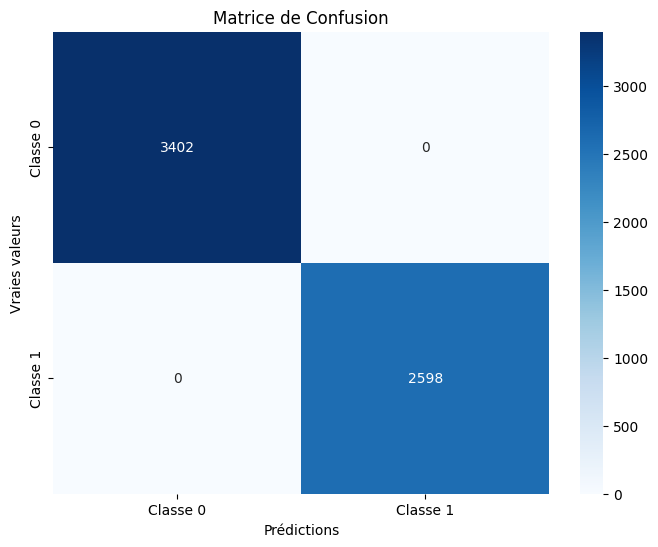

In [65]:
# Générer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()

In [49]:
# Calculer les valeurs TP, FP, FN, TN
TN, FP, FN, TP = conf_matrix.ravel()
print(f'Vrais Négatifs (TN): {TN}')
print(f'Faux Positifs (FP): {FP}')
print(f'Faux Négatifs (FN): {FN}')
print(f'Vrais Positifs (TP): {TP}')

Vrais Négatifs (TN): 3402
Faux Positifs (FP): 0
Faux Négatifs (FN): 0
Vrais Positifs (TP): 2598


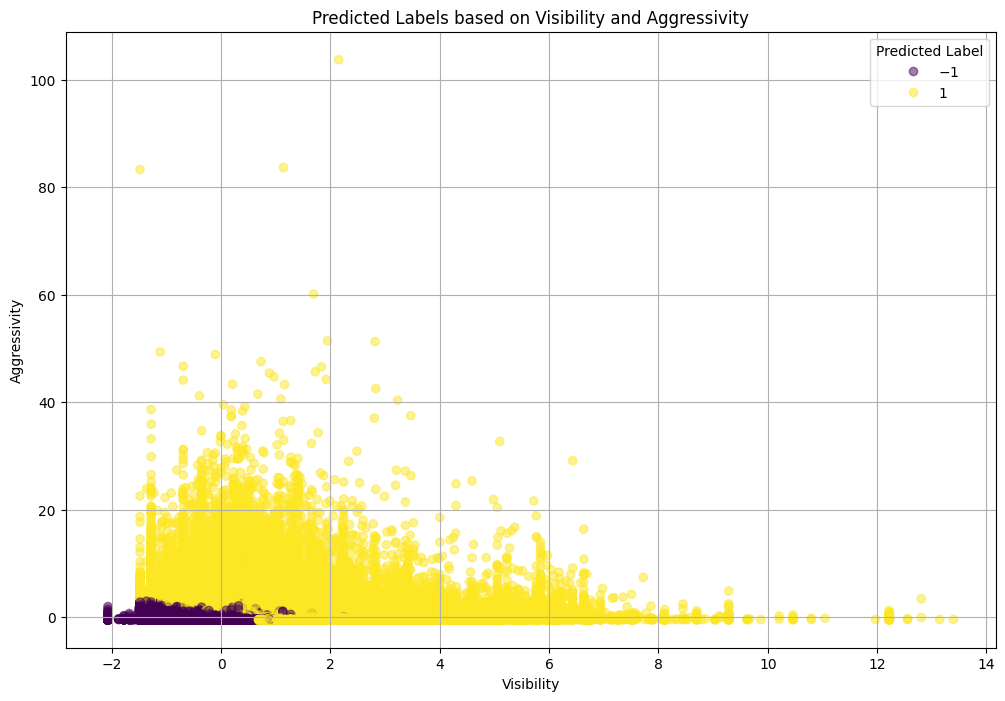

In [66]:
import matplotlib.pyplot as plt

# Préparer les données pour la prédiction
X_full = data[features]
X_full = scaler.transform(X_full)  # Normaliser les données

# Prédire les labels avec le modèle SVM
y_pred_full = svm_classifier.predict(X_full)

# Ajouter les labels prédits au DataFrame
data["predicted_label"] = y_pred_full

# Créer un graphique de visualisation
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data["visibility"], data["aggressivity"], c=data["predicted_label"], cmap='viridis', alpha=0.5)
plt.xlabel("Visibility")
plt.ylabel("Aggressivity")
plt.title("Predicted Labels based on Visibility and Aggressivity")
plt.legend(*scatter.legend_elements(), title="Predicted Label")
plt.grid(True)
plt.show()



In [51]:
# Charger les données de la base de données B
db_B = client['IF29']
collection_B = db.user_db
data_B = pd.DataFrame(list(collection_B.find()))

# Mettre à jour les documents de la base de données B avec le label prédit
for index, row in data.iterrows():
    id_value = row['_id']
    predicted_label = row['predicted_label']
    collection_B.update_one({'_id': id_value}, {'$set': {'svm': predicted_label}})

In [52]:
cluster_describe = data.groupby('predicted_label').describe()
print(cluster_describe)

                       _id                                                   \
                     count          mean           std    min           25%   
predicted_label                                                               
-1               1325058.0  2.108165e+17  3.781588e+17  730.0  2.882693e+08   
 1                518381.0  2.706708e+17  4.112124e+17  418.0  3.568337e+08   

                                                            verified  \
                          50%           75%           max      count   
predicted_label                                                        
-1               1.256408e+09  4.714704e+09  1.008393e+18  1325058.0   
 1               2.267715e+09  7.778816e+17  1.008393e+18   518381.0   

                           ...  ff_ratio                  label            \
                     mean  ...       75%         max      count      mean   
predicted_label            ...                                              
-1          

In [53]:
# Enregistrer le DataFrame en fichier CSV
cluster_describe.to_csv('SVM_describe.csv')